**SEMINAR 1**

Jan Prats 213927 | Oscar Sanz 253613 | Julia Pérez 267029

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#file_path = '/content/drive/My Drive/3r/ML4N/ML for Networks/dataset_Seminar1.txt'
file_path = '/content/drive/My Drive/ML for Networks/dataset_Seminar1.txt'

## **Part I: Data preparation & analysis**

In [ ]:
#CARGAR DATASET

import csv
import pandas as pd

#Read the txt file
data = []
with open(file_path, newline='') as file:
    s1_data = csv.reader(file, delimiter=' ')
    for row in s1_data:
        data.append(row)  # Almacenamos cada fila en la lista data

#Convert the data to a pandas dataframe
df = pd.DataFrame(data)

df.columns = [
    "Number of STAs", "Load", "Size(x)", "Size(y)", "Area", "Contention window",
    "Channel width", "Packet size", "Max RSSI", "Avg RSSI", "Min RSSI",
    "Avg Probability of failure", "Throughput", "Average delay", "Total airtime",
    "Proportional airtime"
]

# Convertir a tipo numérico
df = df.apply(pd.to_numeric, errors='coerce')

print("Dataset")
print(df)

Dataset
       Number of STAs        Load  Size(x)  Size(y)    Area  \
0                40.0  60000000.0     22.0     39.0   858.0   
1                35.0  52500000.0     20.0     33.0   660.0   
2                16.0  12000000.0     34.0     14.0   476.0   
3                37.0  18500000.0     35.0      7.0   245.0   
4                18.0   4500000.0     36.0     35.0  1260.0   
...               ...         ...      ...      ...     ...   
99995            37.0  74000000.0     38.0     21.0   798.0   
99996            19.0  14250000.0     38.0     16.0   608.0   
99997            40.0  30000000.0     30.0      6.0   180.0   
99998            28.0  14000000.0     26.0      8.0   208.0   
99999             6.0  12000000.0     15.0     13.0   195.0   

       Contention window  Channel width  Packet size   Max RSSI   Avg RSSI  \
0                   63.0           80.0       4000.0 -42.928330 -63.163012   
1                   31.0           40.0      10000.0 -47.815800 -63.298410   
2

The .txt file containing simulated Wi-Fi network data is loaded. Then, the data is converted into a pandas DataFrame, which is easier to manipulate. Finally, the columns are renamed with meaningful names, matching the dataset’s structure, and we print the dataset.

In [ ]:
#MEAN and STANDARD DEVIATION of each feature

print("MEAN: ")
print(df.mean())
print("\nSTANDARD DEVIATION")
print(df.std())

MEAN: 
Number of STAs                2.144617e+01
Load                          2.140292e+07
Size(x)                       2.056294e+01
Size(y)                       2.047964e+01
Area                          4.212704e+02
Contention window             2.270439e+02
Channel width                 7.510600e+01
Packet size                   7.997580e+03
Max RSSI                     -4.591117e+01
Avg RSSI                     -5.757743e+01
Min RSSI                     -6.646783e+01
Avg Probability of failure    2.266761e-01
Throughput                    9.716009e+06
Average delay                 4.688176e+06
Total airtime                 7.805603e-01
Proportional airtime          6.607240e-01
dtype: float64

STANDARD DEVIATION
Number of STAs                1.155437e+01
Load                          1.852042e+07
Size(x)                       1.154521e+01
Size(y)                       1.154063e+01
Area                          3.603443e+02
Contention window             3.233509e+02
Channel widt

We print the mean and standard deviation for each feature, using the functions mean() and std(). This provides a basic understanding of the dataset, such as average values and data spread.
High variance in features like Load, Contention window, and Packet size suggests they could be influential in predicting the Throughput.

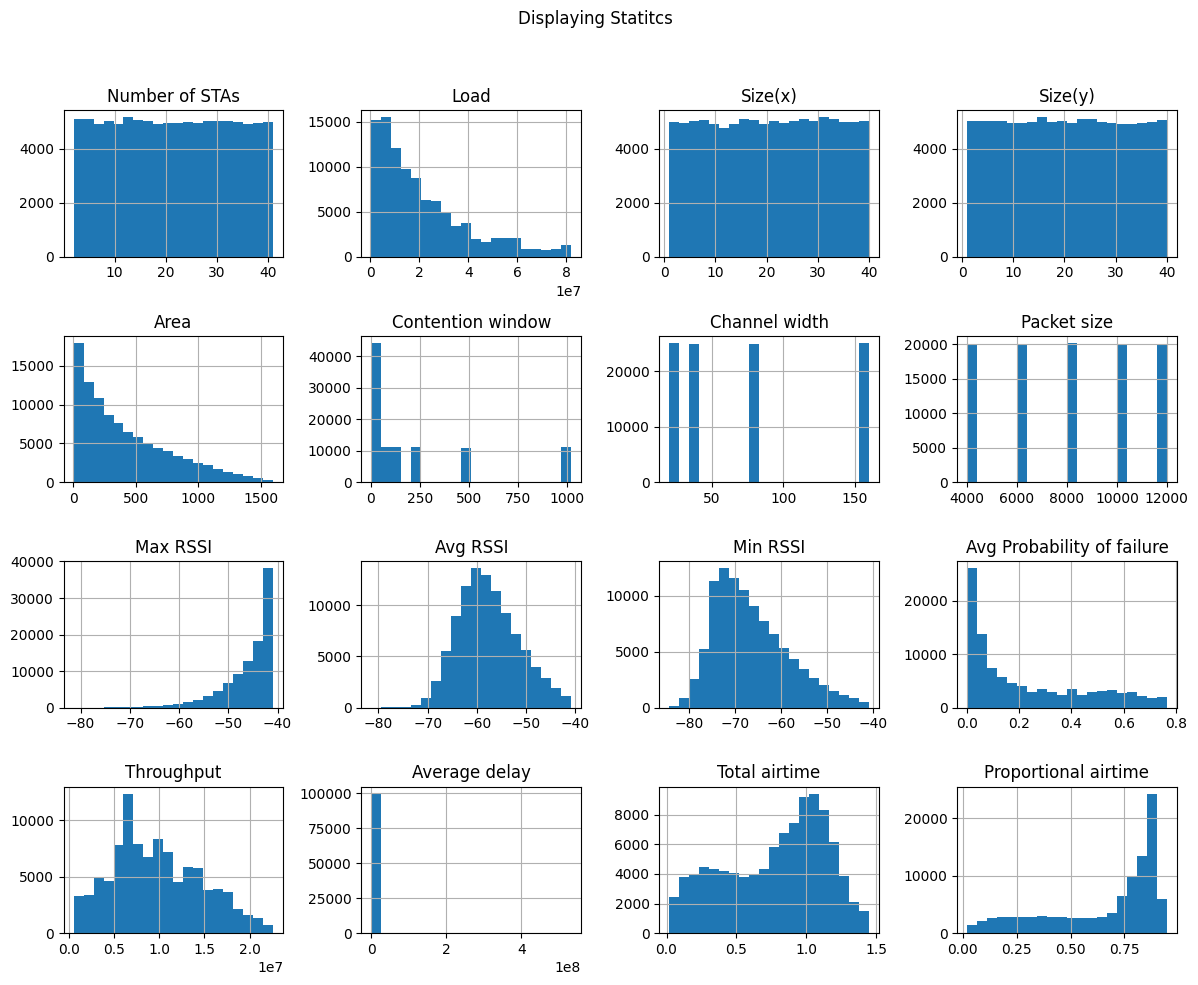

In [ ]:
#PLOTTING TO VISUALIZE HOW DATA IS DISTRIBUTED

import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(12, 10))  #genera un histograma para todas las columnas del dataframe (df), divididos en 20 intervalos cada uno
plt.suptitle("Displaying Statitcs")
plt.tight_layout(rect=[0, 0, 1, 0.95])  #para ajustar los nombres de los ejes y que no se solapen
plt.show()

Histograms are plotted for each column to help visualize how the data is distributed. This can guide feature transformation and reveals outliers or non-normality, which can hurt model performance.

In [ ]:
#PROCESSING THE DATA

print("\nValores nulos en el dataset:")
print(df.isnull().sum())  #Miramos si hay algun valor nulo en alguna columna

df = df.dropna()  #Si hay algun valor nulo eliminamos esa fila

# Normalizamos de los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Mostrar datos normalizados
print("\nDatos normalizados:")
print(df_scaled.head())


Valores nulos en el dataset:
Number of STAs                0
Load                          0
Size(x)                       0
Size(y)                       0
Area                          0
Contention window             0
Channel width                 0
Packet size                   0
Max RSSI                      0
Avg RSSI                      0
Min RSSI                      0
Avg Probability of failure    0
Throughput                    0
Average delay                 0
Total airtime                 0
Proportional airtime          0
dtype: int64

Datos normalizados:
   Number of STAs      Load   Size(x)   Size(y)      Area  Contention window  \
0        0.974359  0.730061  0.538462  0.974359  0.535960           0.058824   
1        0.846154  0.638037  0.487179  0.820513  0.412133           0.027451   
2        0.358974  0.141104  0.846154  0.333333  0.297061           0.247059   
3        0.897436  0.220859  0.871795  0.153846  0.152595           0.027451   
4        0.410256  0.049

Here, the rows with missing values are removed, because the algorithm cannot handle missing values natively. Then, features are normalized using Min-Max scaling, so all values fall between 0 and 1 to ensure that all features are on a similar scale.

In [ ]:
# SPLITTING THE DATA

from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df_scaled.drop("Throughput", axis=1)  # Todas menos Throughput
y = df_scaled["Throughput"]  # Variable objetivo

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (80000, 15)
Testing data: (20000, 15)


The data is split into training (80%) and testing (20%) sets. X contains the features (all columns except "Throughput"), and y is the target variable (Throughput). We separate the Throughtput because is the objective variable. This step is important for training and evaluating model performance on unseen data.

# **Part II: Model implementation**

Create a module that trains and evaluate a linear regression model.

In [ ]:
# FITTING DATA INTO A MULTI-VARIABLE LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#creamos modelo
model = LinearRegression()

#entrenamos modelo
model.fit(X_train, y_train)


LinearRegression()

A multiple linear regression model is created (uses all features) using LinearRegression() function. Then, the model is trained using the training data.

In [ ]:
# EVALUATING PERFORMANCE WITH ERROR FUNCTION

from sklearn.metrics import mean_squared_error, r2_score

# calculamos predicciones con el test set
y_pred = model.predict(X_test)

# evaluamos modelo y calculamos error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.00402474098733044
R-squared: 0.9201624748773763


In this part, two performance metrics are calculated:
1. Mean Squared Error): the average squared difference between actual and predicted values.
2. R-squared: how well the model explains the variability in Throughput. The closer to 1, the better.

Training Loss (MSE): 0.004018995352276566
Test Accuracy (R-squared): 0.9201624748773763


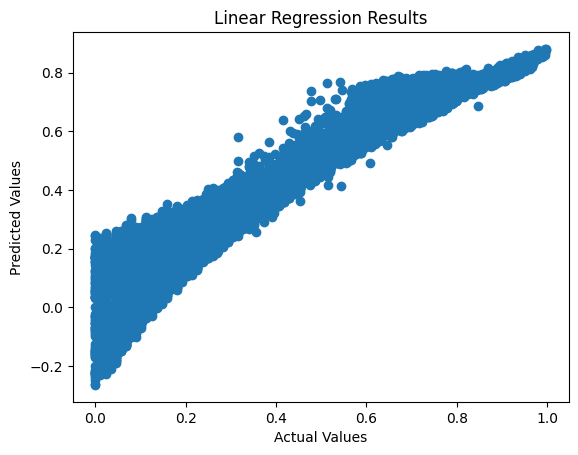

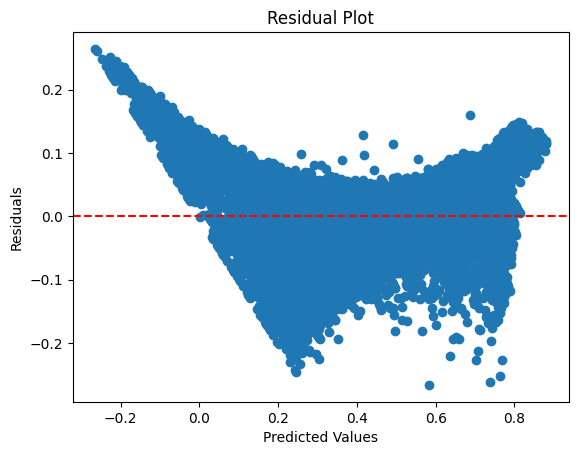

In [ ]:
# PLOTTING RESULTS VISUALLY

import matplotlib.pyplot as plt

#TRAINING LOSS
y_train_pred = model.predict(X_train)  # prediccines training data
train_loss = mean_squared_error(y_train, y_train_pred)

# training loss and test accuracy (R-squared)
print("Training Loss (MSE):", train_loss)
print("Test Accuracy (R-squared):", r2)  # calculado en el bloque anterior


# plot de los valores actuales vs los valores predecidos
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Results")
plt.show()


# calcular residuos ((--> Ideally, the residuals should be randomly scattered around the horizontal line at 0. Patterns
#in the residuals could indicate issues with the model's assumptions or potential non-linear relationships in the data.))
residuals = y_test - y_pred

# Plot
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # linia horizontal en el 0
plt.show()

This helps visualize how well the predictions match the real values. In the first plot, the ideal performance is that the points should align along the diagonal line (y = x).
The second plot, shows the error for each prediction. Ideally, residuals should be randomly scattered around zero.
Seeing this results, we can conclude that the model captures the general trend of throughput and it works reasonably well for lower values. Also, we could say that there's a non-linear relationship between features and throughput that linear regression can't fully capture.